# DogeCoin Prediction Using Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("DOGE-USD.csv")


In [3]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270


In [4]:
data.tail()

,Date,Open,High,Low,Close,Volume
1527,2022-01-14,0.172053,0.203232,0.171283,0.183549,5784004926
1528,2022-01-15,0.183644,0.193600,0.182676,0.185103,1878282290
1529,2022-01-16,0.185093,0.185093,0.175327,0.177176,1102750171
1530,2022-01-17,0.177187,0.177872,0.166891,0.171145,1094379303
1531,2022-01-18,0.171080,0.173651,0.165412,0.166144,1150345216


In [5]:
data.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [6]:
X = data['Close']
X = np.array(X).reshape(-1,1)

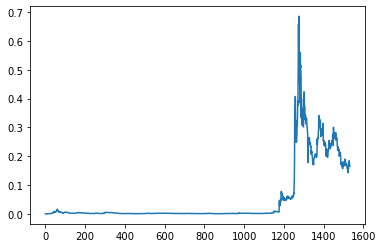

In [7]:
plt.plot(X)

In [8]:
x_data = []
y_data = []
column_len = 25
for i in range(len(X)-column_len-1):
    x_data.append(X[i:i+column_len,0])
    y_data.append(X[i+column_len,0])
x_data = np.array(x_data)
y_data = np.array(y_data)

For time series analysis we need to create a data set from the given X. So, here for making the data set we’re considering i to i+Nth data as input data and i+N+1th data as output data where i ranging from 0 to total length of data – N.

In [9]:
x_data = []
y_data = []
column_len = 25
for i in range(len(X)-column_len-1):
    x_data.append(X[i:i+column_len,0])
    y_data.append(X[i+column_len,0])
x_data = np.array(x_data)
y_data = np.array(y_data)

 We are using RandomForestRegressor for model creation. So let’s train the model with the dataset.

In [10]:
model = RandomForestRegressor(n_estimators=200)
model.fit(x_data, y_data)

RandomForestRegressor(n_estimators=200)

 Let’s predict the dogecoin price for 10 days starting from the last date given in the dataset.

In [11]:
c = X[len(X)-25:]
a = 10
for _ in range(10):
    x = model.predict(c.reshape(1,-1)).reshape(1,-1)
    c = np.concatenate((c[1:], x))
    print(x)

[[0.17004708]]
[[0.17100326]]
[[0.1766376]]
[[0.17837598]]
[[0.17598059]]
[[0.17420937]]
[[0.17366169]]
[[0.17169786]]
[[0.16971533]]
[[0.1644514]]


These are the predicted values of DogeCoin for the next 10 days.